In [35]:
import numpy as np
import mne
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.decomposition import PCA

In [23]:
def load_EEG(filepath, label):
    if label == 'preictal':
        data = np.load(filepath)
        target = np.ones(data.shape[1])
    if label == 'ictal':
        data = np.load(filepath)
        target = -1
    return data, target

In [20]:
rootdir = f'{os.getcwd()}/data/'
case = 'chb01'
seconds = '10s'

preictal_dir=rootdir+case+"/preictal_10s/"
preictal_filenames = [f'{case}_03_preictal{seconds}.npy', f'{case}_04_preictal{seconds}.npy', f'{case}_15_preictal{seconds}.npy', f'{case}_16_preictal{seconds}.npy',
             f'{case}_18_preictal{seconds}.npy', f'{case}_26_preictal{seconds}.npy']

ictal_dir = rootdir+case+"/ictal/"
ictal_filenames = [f'{case}_03_ictal.npy', f'{case}_04_ictal.npy', f'{case}_15_ictal.npy', f'{case}_16_ictal.npy',
             f'{case}_18_ictal.npy', f'{case}_26_ictal.npy']

In [24]:
# load preictal and ictal data
preictal_data_list = []
preictal_feature_list = []

ictal_data_list = []
ictal_feature_list = []
for i in range(6):
    # load preictal data
    pi_filepath = preictal_dir + preictal_filenames[i]
    pi_data, ictarget = load_EEG(pi_filepath, 'preictal')

    # load ictal data
    ic_filepath = ictal_dir + ictal_filenames[i]
    ic_data, ic_target = load_EEG(ic_filepath, 'ictal')

    
    # store data in list
    preictal_data_list.append(pi_data)
    
    ictal_data_list.append(ic_data)


In [115]:
pca = PCA(n_components=2)
A = pca.fit(pi_data)
B = pca.fit(ic_data)

A.explained_variance_ratio_, B.explained_variance_ratio_

(array([0.23658092, 0.19669217]), array([0.23658092, 0.19669217]))

In [55]:
pca_features=pca.fit_transform(pi_data)
pca_features.shape

pca_features1=pca.fit_transform(ic_data)

pca_features.shape, pca_features1.shape

((23, 2), (23, 2))

In [110]:
x1 = pca_features[:,0].tolist()
x2 = pca_features[:,1].tolist()

x3 = pca_features1[:,0].tolist()
x4 = pca_features1[:,1].tolist()

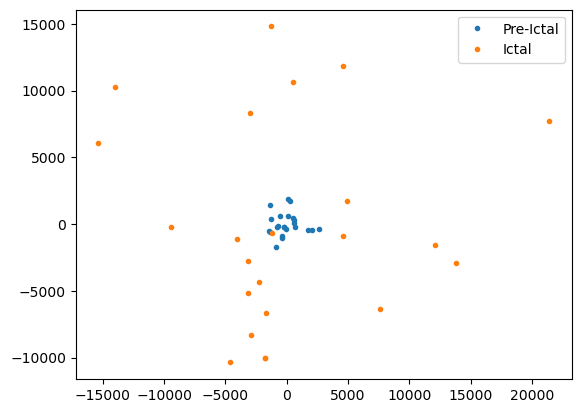

In [113]:
plt.figure()
plt.plot(x1,x2,'.', label = 'Pre-Ictal')
plt.plot(x3,x4, '.', label = 'Ictal')

plt.legend()
plt.show()

In [79]:
pca_features

array([[  554.66077473,   440.06228199],
       [  639.73922836,    62.69035578],
       [  -36.95137034,  -391.41208843],
       [ -727.75618569,  -171.33667557],
       [  137.15537407,  1912.46346188],
       [ 2095.28341044,  -416.65728575],
       [ -346.52248272, -1030.1907215 ],
       [-1435.65178894,  -528.35412945],
       [  271.61636884,  1722.18639775],
       [ 1763.47786238,  -480.88086225],
       [ -359.22042766,  -915.83940022],
       [-1380.88985332,  -591.63807235],
       [  585.1166526 ,   338.7832043 ],
       [  702.71528658,  -196.02696391],
       [ -184.54592362,  -197.74233501],
       [ -818.56601606,  -224.99792275],
       [ 2649.9960262 ,  -365.25835809],
       [ -894.33972124, -1709.00887792],
       [-1344.26513662,  1409.63718666],
       [-1286.45284487,   352.72738577],
       [ -512.95400732,   569.43086475],
       [  112.9006978 ,   609.10488933],
       [ -184.54592362,  -197.74233501]])

In [ ]:
df = pd.DataFrame(preictal_feature_list[0][:,0,:], columns=['Feature 1', 'Feature 2'])
df['Interval'] = 'Preictal'
df_2 = pd.DataFrame(interictal_feature_list[0][:,0,:], columns=['Feature 1', 'Feature 2'])
df_2['Interval'] = 'Interictal'
frames = [df, df_2]
rdf = pd.concat(frames)
rdf

In [121]:
df = pd.DataFrame({'Feature 1':x1, 'Feature 2':x2})
df['Interval'] = 'Preictal'

df_2 = pd.DataFrame({'Feature 1':x3, 'Feature 2':x4})
df_2['Interval'] = 'Ictal'
frames = [df, df_2]
rdf = pd.concat(frames)
rdf

,Feature 1,Feature 2,Interval
0,554.660775,440.062282,Preictal
1,639.739228,62.690356,Preictal
2,-36.951370,-391.412088,Preictal
3,-727.756186,-171.336676,Preictal
4,137.155374,1912.463462,Preictal
5,2095.283410,-416.657286,Preictal
6,-346.522483,-1030.190721,Preictal
7,-1435.651789,-528.354129,Preictal
8,271.616369,1722.186398,Preictal
9,1763.477862,-480.880862,Preictal
